In [1]:
from PIL import Image
import os
import glob
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import splitfolders
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, pooling
from keras.utils import np_utils, to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
import splitfolders
import random

In [36]:
categories = [("PET", 1), ("PS", 2), ("PP", 3), ("PE", 4)] # 2992 / 2992 / 3001 / 2776 = > 11,761

X, y = [], []

In [3]:
splitfolders.ratio("input", output="output", seed=1337, ratio=(0.8, 0.2))

Copying files: 11761 files [00:42, 274.21 files/s]


In [37]:
for i, v in enumerate(categories) : 
    # one-hot encoding
    label = [0 for _ in range(len(categories))]
    label[i] = 1

    image_dir = "./output/train/" + v[0] + "_IMG/*.jpg"
    files = glob.glob(image_dir)
    for file in files :
        print(file)
        image = Image.open(file)
        image = image.convert("RGB")
        image = image.resize((64, 64))
        data = np.asarray(image)
        
#         label = [0 for _ in range(len(categories))]
#         json_file = file.replace(".jpg", ".txt")
#         json_txt = open(json_file, 'r', encoding = 'utf8')
#         category_id = int(json_txt.readline().rstrip().split(" : ")[1])
#         label[category_id - 1] = 1

        X.append(data)
        y.append(label)

./output/train/PET_IMG\PET_025_144_1.jpg
./output/train/PET_IMG\PET_025_144_2.jpg
./output/train/PET_IMG\PET_025_145_0.jpg
./output/train/PET_IMG\PET_025_145_1.jpg
./output/train/PET_IMG\PET_025_145_2.jpg
./output/train/PET_IMG\PET_025_146_1.jpg
./output/train/PET_IMG\PET_025_146_2.jpg
./output/train/PET_IMG\PET_025_147_1.jpg
./output/train/PET_IMG\PET_025_148_0.jpg
./output/train/PET_IMG\PET_025_148_1.jpg
./output/train/PET_IMG\PET_025_148_2.jpg
./output/train/PET_IMG\PET_025_149_0.jpg
./output/train/PET_IMG\PET_025_149_1.jpg
./output/train/PET_IMG\PET_025_150_0.jpg
./output/train/PET_IMG\PET_025_150_1.jpg
./output/train/PET_IMG\PET_025_150_2.jpg
./output/train/PET_IMG\PET_025_151_0.jpg
./output/train/PET_IMG\PET_025_151_1.jpg
./output/train/PET_IMG\PET_025_151_2.jpg
./output/train/PET_IMG\PET_025_152_0.jpg
./output/train/PET_IMG\PET_025_152_1.jpg
./output/train/PET_IMG\PET_025_152_2.jpg
./output/train/PET_IMG\PET_025_153_0.jpg
./output/train/PET_IMG\PET_025_153_2.jpg
./output/train/P

./output/train/PET_IMG\PET_025_252_0.jpg
./output/train/PET_IMG\PET_025_252_1.jpg
./output/train/PET_IMG\PET_025_253_0.jpg
./output/train/PET_IMG\PET_025_253_1.jpg
./output/train/PET_IMG\PET_025_253_2.jpg
./output/train/PET_IMG\PET_025_254_0.jpg
./output/train/PET_IMG\PET_025_254_1.jpg
./output/train/PET_IMG\PET_025_254_2.jpg
./output/train/PET_IMG\PET_025_255_0.jpg
./output/train/PET_IMG\PET_025_256_0.jpg
./output/train/PET_IMG\PET_025_256_1.jpg
./output/train/PET_IMG\PET_025_256_2.jpg
./output/train/PET_IMG\PET_025_258_0.jpg
./output/train/PET_IMG\PET_025_258_1.jpg
./output/train/PET_IMG\PET_025_258_2.jpg
./output/train/PET_IMG\PET_025_259_0.jpg
./output/train/PET_IMG\PET_025_259_2.jpg
./output/train/PET_IMG\PET_025_25_0.jpg
./output/train/PET_IMG\PET_025_25_2.jpg
./output/train/PET_IMG\PET_025_260_0.jpg
./output/train/PET_IMG\PET_025_260_1.jpg
./output/train/PET_IMG\PET_025_260_2.jpg
./output/train/PET_IMG\PET_025_261_1.jpg
./output/train/PET_IMG\PET_025_261_2.jpg
./output/train/PET

./output/train/PET_IMG\PET_025_33_1.jpg
./output/train/PET_IMG\PET_025_33_2.jpg
./output/train/PET_IMG\PET_025_340_0.jpg
./output/train/PET_IMG\PET_025_340_1.jpg
./output/train/PET_IMG\PET_025_340_2.jpg
./output/train/PET_IMG\PET_025_341_2.jpg
./output/train/PET_IMG\PET_025_342_0.jpg
./output/train/PET_IMG\PET_025_342_1.jpg
./output/train/PET_IMG\PET_025_342_2.jpg
./output/train/PET_IMG\PET_025_343_0.jpg
./output/train/PET_IMG\PET_025_343_1.jpg
./output/train/PET_IMG\PET_025_343_2.jpg
./output/train/PET_IMG\PET_025_344_0.jpg
./output/train/PET_IMG\PET_025_344_1.jpg
./output/train/PET_IMG\PET_025_344_2.jpg
./output/train/PET_IMG\PET_025_345_0.jpg
./output/train/PET_IMG\PET_025_345_1.jpg
./output/train/PET_IMG\PET_025_345_2.jpg
./output/train/PET_IMG\PET_025_346_0.jpg
./output/train/PET_IMG\PET_025_346_1.jpg
./output/train/PET_IMG\PET_025_346_2.jpg
./output/train/PET_IMG\PET_025_347_0.jpg
./output/train/PET_IMG\PET_025_347_2.jpg
./output/train/PET_IMG\PET_025_348_1.jpg
./output/train/PET

./output/train/PET_IMG\PET_025_7865_1.jpg
./output/train/PET_IMG\PET_025_7865_2.jpg
./output/train/PET_IMG\PET_025_7866_0.jpg
./output/train/PET_IMG\PET_025_7866_1.jpg
./output/train/PET_IMG\PET_025_7866_2.jpg
./output/train/PET_IMG\PET_025_7867_0.jpg
./output/train/PET_IMG\PET_025_7867_1.jpg
./output/train/PET_IMG\PET_025_7867_2.jpg
./output/train/PET_IMG\PET_025_7868_0.jpg
./output/train/PET_IMG\PET_025_7868_1.jpg
./output/train/PET_IMG\PET_025_7868_2.jpg
./output/train/PET_IMG\PET_025_7869_0.jpg
./output/train/PET_IMG\PET_025_7869_1.jpg
./output/train/PET_IMG\PET_025_7870_0.jpg
./output/train/PET_IMG\PET_025_7870_1.jpg
./output/train/PET_IMG\PET_025_7871_0.jpg
./output/train/PET_IMG\PET_025_7871_2.jpg
./output/train/PET_IMG\PET_025_7872_0.jpg
./output/train/PET_IMG\PET_025_7872_1.jpg
./output/train/PET_IMG\PET_025_7872_2.jpg
./output/train/PET_IMG\PET_025_7873_0.jpg
./output/train/PET_IMG\PET_025_7873_1.jpg
./output/train/PET_IMG\PET_025_7873_2.jpg
./output/train/PET_IMG\PET_025_787

./output/train/PET_IMG\PET_026_351_1.jpg
./output/train/PET_IMG\PET_026_351_2.jpg
./output/train/PET_IMG\PET_026_352_0.jpg
./output/train/PET_IMG\PET_026_352_1.jpg
./output/train/PET_IMG\PET_026_355_0.jpg
./output/train/PET_IMG\PET_026_355_1.jpg
./output/train/PET_IMG\PET_026_355_2.jpg
./output/train/PET_IMG\PET_026_356_0.jpg
./output/train/PET_IMG\PET_026_356_1.jpg
./output/train/PET_IMG\PET_026_356_2.jpg
./output/train/PET_IMG\PET_026_358_0.jpg
./output/train/PET_IMG\PET_026_358_1.jpg
./output/train/PET_IMG\PET_026_358_2.jpg
./output/train/PET_IMG\PET_026_359_1.jpg
./output/train/PET_IMG\PET_026_359_2.jpg
./output/train/PET_IMG\PET_026_361_1.jpg
./output/train/PET_IMG\PET_026_361_2.jpg
./output/train/PET_IMG\PET_026_363_1.jpg
./output/train/PET_IMG\PET_026_363_2.jpg
./output/train/PET_IMG\PET_026_364_0.jpg
./output/train/PET_IMG\PET_026_364_1.jpg
./output/train/PET_IMG\PET_026_364_2.jpg
./output/train/PET_IMG\PET_026_366_0.jpg
./output/train/PET_IMG\PET_026_366_1.jpg
./output/train/P

./output/train/PET_IMG\PET_026_458_1.jpg
./output/train/PET_IMG\PET_026_458_2.jpg
./output/train/PET_IMG\PET_026_459_1.jpg
./output/train/PET_IMG\PET_026_459_2.jpg
./output/train/PET_IMG\PET_026_460_0.jpg
./output/train/PET_IMG\PET_026_461_0.jpg
./output/train/PET_IMG\PET_026_461_1.jpg
./output/train/PET_IMG\PET_026_461_2.jpg
./output/train/PET_IMG\PET_026_462_0.jpg
./output/train/PET_IMG\PET_026_462_1.jpg
./output/train/PET_IMG\PET_026_462_2.jpg
./output/train/PET_IMG\PET_026_463_0.jpg
./output/train/PET_IMG\PET_026_463_1.jpg
./output/train/PET_IMG\PET_026_463_2.jpg
./output/train/PET_IMG\PET_026_464_0.jpg
./output/train/PET_IMG\PET_026_464_1.jpg
./output/train/PET_IMG\PET_026_464_2.jpg
./output/train/PET_IMG\PET_026_465_0.jpg
./output/train/PET_IMG\PET_026_466_0.jpg
./output/train/PET_IMG\PET_026_466_1.jpg
./output/train/PET_IMG\PET_026_467_0.jpg
./output/train/PET_IMG\PET_026_467_1.jpg
./output/train/PET_IMG\PET_026_467_2.jpg
./output/train/PET_IMG\PET_026_468_0.jpg
./output/train/P

./output/train/PET_IMG\PET_026_570_2.jpg
./output/train/PET_IMG\PET_026_571_1.jpg
./output/train/PET_IMG\PET_026_571_2.jpg
./output/train/PET_IMG\PET_026_572_0.jpg
./output/train/PET_IMG\PET_026_572_1.jpg
./output/train/PET_IMG\PET_026_572_2.jpg
./output/train/PET_IMG\PET_026_573_0.jpg
./output/train/PET_IMG\PET_026_573_1.jpg
./output/train/PET_IMG\PET_026_574_1.jpg
./output/train/PET_IMG\PET_026_574_2.jpg
./output/train/PET_IMG\PET_026_575_0.jpg
./output/train/PET_IMG\PET_026_575_1.jpg
./output/train/PET_IMG\PET_026_575_2.jpg
./output/train/PET_IMG\PET_026_576_0.jpg
./output/train/PET_IMG\PET_026_576_1.jpg
./output/train/PET_IMG\PET_026_576_2.jpg
./output/train/PET_IMG\PET_026_577_0.jpg
./output/train/PET_IMG\PET_026_577_1.jpg
./output/train/PET_IMG\PET_026_578_0.jpg
./output/train/PET_IMG\PET_026_578_1.jpg
./output/train/PET_IMG\PET_026_578_2.jpg
./output/train/PET_IMG\PET_026_579_0.jpg
./output/train/PET_IMG\PET_026_579_2.jpg
./output/train/PET_IMG\PET_026_580_1.jpg
./output/train/P

./output/train/PET_IMG\PET_026_660_2.jpg
./output/train/PET_IMG\PET_026_662_0.jpg
./output/train/PET_IMG\PET_026_662_1.jpg
./output/train/PET_IMG\PET_026_662_2.jpg
./output/train/PET_IMG\PET_026_663_0.jpg
./output/train/PET_IMG\PET_026_663_2.jpg
./output/train/PET_IMG\PET_026_664_0.jpg
./output/train/PET_IMG\PET_026_664_1.jpg
./output/train/PET_IMG\PET_026_664_2.jpg
./output/train/PET_IMG\PET_026_665_0.jpg
./output/train/PET_IMG\PET_026_665_1.jpg
./output/train/PET_IMG\PET_026_665_2.jpg
./output/train/PET_IMG\PET_026_666_0.jpg
./output/train/PET_IMG\PET_026_666_1.jpg
./output/train/PET_IMG\PET_026_666_2.jpg
./output/train/PET_IMG\PET_026_667_0.jpg
./output/train/PET_IMG\PET_026_667_1.jpg
./output/train/PET_IMG\PET_026_667_2.jpg
./output/train/PET_IMG\PET_026_668_0.jpg
./output/train/PET_IMG\PET_026_668_1.jpg
./output/train/PET_IMG\PET_026_668_2.jpg
./output/train/PET_IMG\PET_026_669_0.jpg
./output/train/PET_IMG\PET_026_669_1.jpg
./output/train/PET_IMG\PET_026_669_2.jpg
./output/train/P

./output/train/PET_IMG\PET_027_2246_0.jpg
./output/train/PET_IMG\PET_027_2246_1.jpg
./output/train/PET_IMG\PET_027_2246_2.jpg
./output/train/PET_IMG\PET_027_2248_1.jpg
./output/train/PET_IMG\PET_027_2248_2.jpg
./output/train/PET_IMG\PET_027_2249_0.jpg
./output/train/PET_IMG\PET_027_2249_1.jpg
./output/train/PET_IMG\PET_027_2249_2.jpg
./output/train/PET_IMG\PET_027_2250_0.jpg
./output/train/PET_IMG\PET_027_2250_1.jpg
./output/train/PET_IMG\PET_027_2250_2.jpg
./output/train/PET_IMG\PET_027_2252_0.jpg
./output/train/PET_IMG\PET_027_2252_1.jpg
./output/train/PET_IMG\PET_027_2252_2.jpg
./output/train/PET_IMG\PET_027_2253_0.jpg
./output/train/PET_IMG\PET_027_2253_1.jpg
./output/train/PET_IMG\PET_027_2253_2.jpg
./output/train/PET_IMG\PET_027_2254_1.jpg
./output/train/PET_IMG\PET_027_2254_2.jpg
./output/train/PET_IMG\PET_027_2255_1.jpg
./output/train/PET_IMG\PET_027_2255_2.jpg
./output/train/PET_IMG\PET_027_2256_0.jpg
./output/train/PET_IMG\PET_027_2256_2.jpg
./output/train/PET_IMG\PET_027_225

./output/train/PET_IMG\PET_027_2345_0.jpg
./output/train/PET_IMG\PET_027_2345_1.jpg
./output/train/PET_IMG\PET_027_2345_2.jpg
./output/train/PET_IMG\PET_027_2346_1.jpg
./output/train/PET_IMG\PET_027_2346_2.jpg
./output/train/PET_IMG\PET_027_2347_0.jpg
./output/train/PET_IMG\PET_027_2347_1.jpg
./output/train/PET_IMG\PET_027_2347_2.jpg
./output/train/PET_IMG\PET_027_2349_0.jpg
./output/train/PET_IMG\PET_027_2349_2.jpg
./output/train/PET_IMG\PET_027_2350_0.jpg
./output/train/PET_IMG\PET_027_2350_1.jpg
./output/train/PET_IMG\PET_027_2350_2.jpg
./output/train/PET_IMG\PET_027_2351_0.jpg
./output/train/PET_IMG\PET_027_2351_1.jpg
./output/train/PET_IMG\PET_027_2351_2.jpg
./output/train/PET_IMG\PET_027_2352_0.jpg
./output/train/PET_IMG\PET_027_2352_1.jpg
./output/train/PET_IMG\PET_027_2352_2.jpg
./output/train/PET_IMG\PET_027_2353_0.jpg
./output/train/PET_IMG\PET_027_2353_1.jpg
./output/train/PET_IMG\PET_027_2354_0.jpg
./output/train/PET_IMG\PET_027_2354_1.jpg
./output/train/PET_IMG\PET_027_235

./output/train/PET_IMG\PET_027_2454_1.jpg
./output/train/PET_IMG\PET_027_2454_2.jpg
./output/train/PET_IMG\PET_027_2455_1.jpg
./output/train/PET_IMG\PET_027_2455_2.jpg
./output/train/PET_IMG\PET_027_2456_0.jpg
./output/train/PET_IMG\PET_027_2456_1.jpg
./output/train/PET_IMG\PET_027_2457_0.jpg
./output/train/PET_IMG\PET_027_2457_1.jpg
./output/train/PET_IMG\PET_027_2457_2.jpg
./output/train/PET_IMG\PET_027_2458_1.jpg
./output/train/PET_IMG\PET_027_2458_2.jpg
./output/train/PET_IMG\PET_027_2459_0.jpg
./output/train/PET_IMG\PET_027_2459_1.jpg
./output/train/PET_IMG\PET_027_2459_2.jpg
./output/train/PET_IMG\PET_027_2460_1.jpg
./output/train/PET_IMG\PET_027_2460_2.jpg
./output/train/PET_IMG\PET_027_2461_0.jpg
./output/train/PET_IMG\PET_027_2461_1.jpg
./output/train/PET_IMG\PET_027_2461_2.jpg
./output/train/PET_IMG\PET_027_2462_0.jpg
./output/train/PET_IMG\PET_027_2462_1.jpg
./output/train/PET_IMG\PET_027_2462_2.jpg
./output/train/PET_IMG\PET_027_2463_0.jpg
./output/train/PET_IMG\PET_027_246

./output/train/PS_IMG\PS_040_370_1.jpg
./output/train/PS_IMG\PS_040_370_2.jpg
./output/train/PS_IMG\PS_040_371_0.jpg
./output/train/PS_IMG\PS_040_371_2.jpg
./output/train/PS_IMG\PS_040_372_2.jpg
./output/train/PS_IMG\PS_040_373_1.jpg
./output/train/PS_IMG\PS_040_373_2.jpg
./output/train/PS_IMG\PS_040_374_0.jpg
./output/train/PS_IMG\PS_040_374_1.jpg
./output/train/PS_IMG\PS_040_374_2.jpg
./output/train/PS_IMG\PS_040_375_0.jpg
./output/train/PS_IMG\PS_040_375_1.jpg
./output/train/PS_IMG\PS_040_376_0.jpg
./output/train/PS_IMG\PS_040_376_2.jpg
./output/train/PS_IMG\PS_040_377_0.jpg
./output/train/PS_IMG\PS_040_377_1.jpg
./output/train/PS_IMG\PS_040_377_2.jpg
./output/train/PS_IMG\PS_040_378_0.jpg
./output/train/PS_IMG\PS_040_379_0.jpg
./output/train/PS_IMG\PS_040_379_2.jpg
./output/train/PS_IMG\PS_040_37_0.jpg
./output/train/PS_IMG\PS_040_37_1.jpg
./output/train/PS_IMG\PS_040_37_2.jpg
./output/train/PS_IMG\PS_040_380_0.jpg
./output/train/PS_IMG\PS_040_380_1.jpg
./output/train/PS_IMG\PS_040

./output/train/PS_IMG\PS_040_460_2.jpg
./output/train/PS_IMG\PS_040_461_0.jpg
./output/train/PS_IMG\PS_040_461_1.jpg
./output/train/PS_IMG\PS_040_461_2.jpg
./output/train/PS_IMG\PS_040_462_0.jpg
./output/train/PS_IMG\PS_040_462_1.jpg
./output/train/PS_IMG\PS_040_462_2.jpg
./output/train/PS_IMG\PS_040_463_0.jpg
./output/train/PS_IMG\PS_040_463_1.jpg
./output/train/PS_IMG\PS_040_463_2.jpg
./output/train/PS_IMG\PS_040_464_1.jpg
./output/train/PS_IMG\PS_040_464_2.jpg
./output/train/PS_IMG\PS_040_465_0.jpg
./output/train/PS_IMG\PS_040_465_1.jpg
./output/train/PS_IMG\PS_040_465_2.jpg
./output/train/PS_IMG\PS_040_466_0.jpg
./output/train/PS_IMG\PS_040_466_1.jpg
./output/train/PS_IMG\PS_040_466_2.jpg
./output/train/PS_IMG\PS_040_467_1.jpg
./output/train/PS_IMG\PS_040_467_2.jpg
./output/train/PS_IMG\PS_040_468_0.jpg
./output/train/PS_IMG\PS_040_469_1.jpg
./output/train/PS_IMG\PS_040_469_2.jpg
./output/train/PS_IMG\PS_040_470_0.jpg
./output/train/PS_IMG\PS_040_470_1.jpg
./output/train/PS_IMG\PS_

./output/train/PS_IMG\PS_040_64_0.jpg
./output/train/PS_IMG\PS_040_64_1.jpg
./output/train/PS_IMG\PS_040_64_2.jpg
./output/train/PS_IMG\PS_040_65_2.jpg
./output/train/PS_IMG\PS_040_66_0.jpg
./output/train/PS_IMG\PS_040_66_1.jpg
./output/train/PS_IMG\PS_040_67_0.jpg
./output/train/PS_IMG\PS_040_67_1.jpg
./output/train/PS_IMG\PS_040_67_2.jpg
./output/train/PS_IMG\PS_040_68_0.jpg
./output/train/PS_IMG\PS_040_68_2.jpg
./output/train/PS_IMG\PS_040_69_0.jpg
./output/train/PS_IMG\PS_040_69_1.jpg
./output/train/PS_IMG\PS_040_6_0.jpg
./output/train/PS_IMG\PS_040_70_0.jpg
./output/train/PS_IMG\PS_040_70_1.jpg
./output/train/PS_IMG\PS_040_70_2.jpg
./output/train/PS_IMG\PS_040_71_0.jpg
./output/train/PS_IMG\PS_040_71_1.jpg
./output/train/PS_IMG\PS_040_71_2.jpg
./output/train/PS_IMG\PS_040_72_0.jpg
./output/train/PS_IMG\PS_040_72_1.jpg
./output/train/PS_IMG\PS_040_72_2.jpg
./output/train/PS_IMG\PS_040_7371_1.jpg
./output/train/PS_IMG\PS_040_7371_2.jpg
./output/train/PS_IMG\PS_040_7372_0.jpg
./outpu

./output/train/PS_IMG\PS_040_7482_2.jpg
./output/train/PS_IMG\PS_040_7483_0.jpg
./output/train/PS_IMG\PS_040_7483_1.jpg
./output/train/PS_IMG\PS_040_7483_2.jpg
./output/train/PS_IMG\PS_040_7484_0.jpg
./output/train/PS_IMG\PS_040_7484_2.jpg
./output/train/PS_IMG\PS_040_7485_0.jpg
./output/train/PS_IMG\PS_040_7485_1.jpg
./output/train/PS_IMG\PS_040_7486_0.jpg
./output/train/PS_IMG\PS_040_7486_1.jpg
./output/train/PS_IMG\PS_040_7486_2.jpg
./output/train/PS_IMG\PS_040_7487_1.jpg
./output/train/PS_IMG\PS_040_7487_2.jpg
./output/train/PS_IMG\PS_040_7488_1.jpg
./output/train/PS_IMG\PS_040_7488_2.jpg
./output/train/PS_IMG\PS_040_7489_0.jpg
./output/train/PS_IMG\PS_040_7489_1.jpg
./output/train/PS_IMG\PS_040_7489_2.jpg
./output/train/PS_IMG\PS_040_7490_0.jpg
./output/train/PS_IMG\PS_040_7490_1.jpg
./output/train/PS_IMG\PS_040_7490_2.jpg
./output/train/PS_IMG\PS_040_7491_0.jpg
./output/train/PS_IMG\PS_040_7491_1.jpg
./output/train/PS_IMG\PS_040_7491_2.jpg
./output/train/PS_IMG\PS_040_7492_0.jpg


./output/train/PS_IMG\PS_040_7595_2.jpg
./output/train/PS_IMG\PS_040_7596_0.jpg
./output/train/PS_IMG\PS_040_7596_1.jpg
./output/train/PS_IMG\PS_040_7596_2.jpg
./output/train/PS_IMG\PS_040_7597_1.jpg
./output/train/PS_IMG\PS_040_7597_2.jpg
./output/train/PS_IMG\PS_040_7598_0.jpg
./output/train/PS_IMG\PS_040_7598_1.jpg
./output/train/PS_IMG\PS_040_7598_2.jpg
./output/train/PS_IMG\PS_040_7599_0.jpg
./output/train/PS_IMG\PS_040_7599_2.jpg
./output/train/PS_IMG\PS_040_75_0.jpg
./output/train/PS_IMG\PS_040_75_1.jpg
./output/train/PS_IMG\PS_040_75_2.jpg
./output/train/PS_IMG\PS_040_7600_0.jpg
./output/train/PS_IMG\PS_040_7600_1.jpg
./output/train/PS_IMG\PS_040_7600_2.jpg
./output/train/PS_IMG\PS_040_7601_0.jpg
./output/train/PS_IMG\PS_040_7601_1.jpg
./output/train/PS_IMG\PS_040_7602_1.jpg
./output/train/PS_IMG\PS_040_7602_2.jpg
./output/train/PS_IMG\PS_040_7603_0.jpg
./output/train/PS_IMG\PS_040_7603_1.jpg
./output/train/PS_IMG\PS_040_7603_2.jpg
./output/train/PS_IMG\PS_040_7604_0.jpg
./outp

./output/train/PS_IMG\PS_041_1279_2.jpg
./output/train/PS_IMG\PS_041_1280_0.jpg
./output/train/PS_IMG\PS_041_1280_1.jpg
./output/train/PS_IMG\PS_041_1280_2.jpg
./output/train/PS_IMG\PS_041_1281_0.jpg
./output/train/PS_IMG\PS_041_1281_1.jpg
./output/train/PS_IMG\PS_041_1281_2.jpg
./output/train/PS_IMG\PS_041_1282_1.jpg
./output/train/PS_IMG\PS_041_1282_2.jpg
./output/train/PS_IMG\PS_041_1283_0.jpg
./output/train/PS_IMG\PS_041_1283_1.jpg
./output/train/PS_IMG\PS_041_1284_0.jpg
./output/train/PS_IMG\PS_041_1284_2.jpg
./output/train/PS_IMG\PS_041_1285_0.jpg
./output/train/PS_IMG\PS_041_1285_1.jpg
./output/train/PS_IMG\PS_041_1285_2.jpg
./output/train/PS_IMG\PS_041_1286_1.jpg
./output/train/PS_IMG\PS_041_1286_2.jpg
./output/train/PS_IMG\PS_041_1287_0.jpg
./output/train/PS_IMG\PS_041_1287_1.jpg
./output/train/PS_IMG\PS_041_1287_2.jpg
./output/train/PS_IMG\PS_041_1288_0.jpg
./output/train/PS_IMG\PS_041_1289_0.jpg
./output/train/PS_IMG\PS_041_1289_1.jpg
./output/train/PS_IMG\PS_041_1289_2.jpg


./output/train/PS_IMG\PS_041_1377_0.jpg
./output/train/PS_IMG\PS_041_1377_2.jpg
./output/train/PS_IMG\PS_041_1378_0.jpg
./output/train/PS_IMG\PS_041_1378_1.jpg
./output/train/PS_IMG\PS_041_1379_0.jpg
./output/train/PS_IMG\PS_041_1379_1.jpg
./output/train/PS_IMG\PS_041_1379_2.jpg
./output/train/PS_IMG\PS_041_1380_2.jpg
./output/train/PS_IMG\PS_041_1381_0.jpg
./output/train/PS_IMG\PS_041_1381_1.jpg
./output/train/PS_IMG\PS_041_1381_2.jpg
./output/train/PS_IMG\PS_041_1382_0.jpg
./output/train/PS_IMG\PS_041_1382_1.jpg
./output/train/PS_IMG\PS_041_1382_2.jpg
./output/train/PS_IMG\PS_041_1383_0.jpg
./output/train/PS_IMG\PS_041_1383_1.jpg
./output/train/PS_IMG\PS_041_1383_2.jpg
./output/train/PS_IMG\PS_041_1384_0.jpg
./output/train/PS_IMG\PS_041_1384_2.jpg
./output/train/PS_IMG\PS_041_1385_0.jpg
./output/train/PS_IMG\PS_041_1385_1.jpg
./output/train/PS_IMG\PS_041_1385_2.jpg
./output/train/PS_IMG\PS_041_1386_0.jpg
./output/train/PS_IMG\PS_041_1386_2.jpg
./output/train/PS_IMG\PS_041_1387_2.jpg


./output/train/PS_IMG\PS_041_5378_2.jpg
./output/train/PS_IMG\PS_041_5379_0.jpg
./output/train/PS_IMG\PS_041_5379_1.jpg
./output/train/PS_IMG\PS_041_5379_2.jpg
./output/train/PS_IMG\PS_041_5380_0.jpg
./output/train/PS_IMG\PS_041_5380_1.jpg
./output/train/PS_IMG\PS_041_5381_0.jpg
./output/train/PS_IMG\PS_041_5381_1.jpg
./output/train/PS_IMG\PS_041_5381_2.jpg
./output/train/PS_IMG\PS_041_5382_1.jpg
./output/train/PS_IMG\PS_041_5382_2.jpg
./output/train/PS_IMG\PS_041_5383_1.jpg
./output/train/PS_IMG\PS_041_5384_0.jpg
./output/train/PS_IMG\PS_041_5384_1.jpg
./output/train/PS_IMG\PS_041_5384_2.jpg
./output/train/PS_IMG\PS_041_5385_0.jpg
./output/train/PS_IMG\PS_041_5385_1.jpg
./output/train/PS_IMG\PS_041_5385_2.jpg
./output/train/PS_IMG\PS_041_5386_0.jpg
./output/train/PS_IMG\PS_041_5386_1.jpg
./output/train/PS_IMG\PS_041_5386_2.jpg
./output/train/PS_IMG\PS_041_5387_0.jpg
./output/train/PS_IMG\PS_041_5387_1.jpg
./output/train/PS_IMG\PS_041_5387_2.jpg
./output/train/PS_IMG\PS_041_5388_0.jpg


./output/train/PS_IMG\PS_041_5474_0.jpg
./output/train/PS_IMG\PS_041_5474_1.jpg
./output/train/PS_IMG\PS_041_5474_2.jpg
./output/train/PS_IMG\PS_041_5475_0.jpg
./output/train/PS_IMG\PS_041_5475_1.jpg
./output/train/PS_IMG\PS_041_5475_2.jpg
./output/train/PS_IMG\PS_041_5476_1.jpg
./output/train/PS_IMG\PS_041_5476_2.jpg
./output/train/PS_IMG\PS_041_5477_0.jpg
./output/train/PS_IMG\PS_041_5477_2.jpg
./output/train/PS_IMG\PS_041_5478_0.jpg
./output/train/PS_IMG\PS_041_5478_1.jpg
./output/train/PS_IMG\PS_041_5478_2.jpg
./output/train/PS_IMG\PS_041_5480_0.jpg
./output/train/PS_IMG\PS_041_5480_1.jpg
./output/train/PS_IMG\PS_041_5480_2.jpg
./output/train/PS_IMG\PS_041_5481_0.jpg
./output/train/PS_IMG\PS_041_5482_2.jpg
./output/train/PS_IMG\PS_041_5483_0.jpg
./output/train/PS_IMG\PS_041_5483_1.jpg
./output/train/PS_IMG\PS_041_5484_0.jpg
./output/train/PS_IMG\PS_041_5484_1.jpg
./output/train/PS_IMG\PS_041_5484_2.jpg
./output/train/PS_IMG\PS_041_5485_2.jpg
./output/train/PS_IMG\PS_041_5486_0.jpg


./output/train/PS_IMG\PS_041_5584_2.jpg
./output/train/PS_IMG\PS_041_5585_0.jpg
./output/train/PS_IMG\PS_041_5585_1.jpg
./output/train/PS_IMG\PS_041_5585_2.jpg
./output/train/PS_IMG\PS_041_5586_0.jpg
./output/train/PS_IMG\PS_041_5586_1.jpg
./output/train/PS_IMG\PS_041_5586_2.jpg
./output/train/PS_IMG\PS_041_5587_0.jpg
./output/train/PS_IMG\PS_041_5588_0.jpg
./output/train/PS_IMG\PS_041_5588_1.jpg
./output/train/PS_IMG\PS_041_5588_2.jpg
./output/train/PS_IMG\PS_041_5589_0.jpg
./output/train/PS_IMG\PS_041_5589_2.jpg
./output/train/PS_IMG\PS_041_5590_0.jpg
./output/train/PS_IMG\PS_041_5590_1.jpg
./output/train/PS_IMG\PS_041_5591_0.jpg
./output/train/PS_IMG\PS_041_5591_1.jpg
./output/train/PS_IMG\PS_041_5592_0.jpg
./output/train/PS_IMG\PS_041_5592_1.jpg
./output/train/PS_IMG\PS_041_5592_2.jpg
./output/train/PS_IMG\PS_041_5593_0.jpg
./output/train/PS_IMG\PS_041_5593_1.jpg
./output/train/PS_IMG\PS_041_5593_2.jpg
./output/train/PS_IMG\PS_041_5594_0.jpg
./output/train/PS_IMG\PS_041_5594_1.jpg


./output/train/PP_IMG\PP_061_331_2.jpg
./output/train/PP_IMG\PP_061_332_0.jpg
./output/train/PP_IMG\PP_061_332_1.jpg
./output/train/PP_IMG\PP_061_332_2.jpg
./output/train/PP_IMG\PP_061_333_0.jpg
./output/train/PP_IMG\PP_061_334_0.jpg
./output/train/PP_IMG\PP_061_334_1.jpg
./output/train/PP_IMG\PP_061_334_2.jpg
./output/train/PP_IMG\PP_061_335_0.jpg
./output/train/PP_IMG\PP_061_335_1.jpg
./output/train/PP_IMG\PP_061_335_2.jpg
./output/train/PP_IMG\PP_061_336_0.jpg
./output/train/PP_IMG\PP_061_336_1.jpg
./output/train/PP_IMG\PP_061_336_2.jpg
./output/train/PP_IMG\PP_061_337_0.jpg
./output/train/PP_IMG\PP_061_337_2.jpg
./output/train/PP_IMG\PP_061_338_1.jpg
./output/train/PP_IMG\PP_061_340_0.jpg
./output/train/PP_IMG\PP_061_340_1.jpg
./output/train/PP_IMG\PP_061_340_2.jpg
./output/train/PP_IMG\PP_061_341_0.jpg
./output/train/PP_IMG\PP_061_341_1.jpg
./output/train/PP_IMG\PP_061_341_2.jpg
./output/train/PP_IMG\PP_061_342_0.jpg
./output/train/PP_IMG\PP_061_342_1.jpg
./output/train/PP_IMG\PP_

./output/train/PP_IMG\PP_061_440_2.jpg
./output/train/PP_IMG\PP_061_441_0.jpg
./output/train/PP_IMG\PP_061_441_1.jpg
./output/train/PP_IMG\PP_061_441_2.jpg
./output/train/PP_IMG\PP_061_442_2.jpg
./output/train/PP_IMG\PP_061_443_0.jpg
./output/train/PP_IMG\PP_061_443_1.jpg
./output/train/PP_IMG\PP_061_443_2.jpg
./output/train/PP_IMG\PP_061_444_0.jpg
./output/train/PP_IMG\PP_061_444_1.jpg
./output/train/PP_IMG\PP_061_444_2.jpg
./output/train/PP_IMG\PP_061_445_0.jpg
./output/train/PP_IMG\PP_061_445_1.jpg
./output/train/PP_IMG\PP_061_445_2.jpg
./output/train/PP_IMG\PP_061_446_0.jpg
./output/train/PP_IMG\PP_061_446_1.jpg
./output/train/PP_IMG\PP_061_446_2.jpg
./output/train/PP_IMG\PP_061_447_0.jpg
./output/train/PP_IMG\PP_061_447_1.jpg
./output/train/PP_IMG\PP_061_447_2.jpg
./output/train/PP_IMG\PP_061_448_0.jpg
./output/train/PP_IMG\PP_061_448_1.jpg
./output/train/PP_IMG\PP_061_448_2.jpg
./output/train/PP_IMG\PP_061_449_0.jpg
./output/train/PP_IMG\PP_061_451_0.jpg
./output/train/PP_IMG\PP_

./output/train/PP_IMG\PP_061_7057_2.jpg
./output/train/PP_IMG\PP_061_7058_1.jpg
./output/train/PP_IMG\PP_061_7058_2.jpg
./output/train/PP_IMG\PP_061_7059_0.jpg
./output/train/PP_IMG\PP_061_7059_1.jpg
./output/train/PP_IMG\PP_061_7059_2.jpg
./output/train/PP_IMG\PP_061_7061_0.jpg
./output/train/PP_IMG\PP_061_7061_1.jpg
./output/train/PP_IMG\PP_061_7061_2.jpg
./output/train/PP_IMG\PP_061_7062_0.jpg
./output/train/PP_IMG\PP_061_7062_1.jpg
./output/train/PP_IMG\PP_061_7062_2.jpg
./output/train/PP_IMG\PP_061_7063_0.jpg
./output/train/PP_IMG\PP_061_7063_1.jpg
./output/train/PP_IMG\PP_061_7063_2.jpg
./output/train/PP_IMG\PP_061_7064_0.jpg
./output/train/PP_IMG\PP_061_7064_1.jpg
./output/train/PP_IMG\PP_061_7065_0.jpg
./output/train/PP_IMG\PP_061_7065_1.jpg
./output/train/PP_IMG\PP_061_7066_0.jpg
./output/train/PP_IMG\PP_061_7066_2.jpg
./output/train/PP_IMG\PP_061_7067_0.jpg
./output/train/PP_IMG\PP_061_7067_1.jpg
./output/train/PP_IMG\PP_061_7067_2.jpg
./output/train/PP_IMG\PP_061_7068_0.jpg


./output/train/PP_IMG\PP_061_7159_2.jpg
./output/train/PP_IMG\PP_061_7160_0.jpg
./output/train/PP_IMG\PP_061_7160_1.jpg
./output/train/PP_IMG\PP_061_7160_2.jpg
./output/train/PP_IMG\PP_061_7161_0.jpg
./output/train/PP_IMG\PP_061_7161_1.jpg
./output/train/PP_IMG\PP_061_7161_2.jpg
./output/train/PP_IMG\PP_061_7162_0.jpg
./output/train/PP_IMG\PP_061_7162_2.jpg
./output/train/PP_IMG\PP_061_7163_0.jpg
./output/train/PP_IMG\PP_061_7163_1.jpg
./output/train/PP_IMG\PP_061_7163_2.jpg
./output/train/PP_IMG\PP_061_7165_0.jpg
./output/train/PP_IMG\PP_061_7165_1.jpg
./output/train/PP_IMG\PP_061_7165_2.jpg
./output/train/PP_IMG\PP_061_7166_0.jpg
./output/train/PP_IMG\PP_061_7167_0.jpg
./output/train/PP_IMG\PP_061_7167_1.jpg
./output/train/PP_IMG\PP_061_7167_2.jpg
./output/train/PP_IMG\PP_061_7169_0.jpg
./output/train/PP_IMG\PP_061_7169_2.jpg
./output/train/PP_IMG\PP_061_7170_0.jpg
./output/train/PP_IMG\PP_061_7170_1.jpg
./output/train/PP_IMG\PP_061_7170_2.jpg
./output/train/PP_IMG\PP_061_7171_0.jpg


./output/train/PP_IMG\PP_061_7284_0.jpg
./output/train/PP_IMG\PP_061_7284_1.jpg
./output/train/PP_IMG\PP_061_7284_2.jpg
./output/train/PP_IMG\PP_061_7285_0.jpg
./output/train/PP_IMG\PP_061_7285_1.jpg
./output/train/PP_IMG\PP_061_7285_2.jpg
./output/train/PP_IMG\PP_061_7286_0.jpg
./output/train/PP_IMG\PP_061_7286_1.jpg
./output/train/PP_IMG\PP_061_7286_2.jpg
./output/train/PP_IMG\PP_061_7287_0.jpg
./output/train/PP_IMG\PP_061_7288_0.jpg
./output/train/PP_IMG\PP_061_7288_1.jpg
./output/train/PP_IMG\PP_061_7290_0.jpg
./output/train/PP_IMG\PP_061_7290_1.jpg
./output/train/PP_IMG\PP_061_7290_2.jpg
./output/train/PP_IMG\PP_061_7291_0.jpg
./output/train/PP_IMG\PP_061_7291_2.jpg
./output/train/PP_IMG\PP_061_7292_0.jpg
./output/train/PP_IMG\PP_061_7292_2.jpg
./output/train/PP_IMG\PP_061_7293_0.jpg
./output/train/PP_IMG\PP_061_7293_1.jpg
./output/train/PP_IMG\PP_061_7293_2.jpg
./output/train/PP_IMG\PP_061_7294_0.jpg
./output/train/PP_IMG\PP_061_7294_1.jpg
./output/train/PP_IMG\PP_061_7295_0.jpg


./output/train/PP_IMG\PP_064_4583_0.jpg
./output/train/PP_IMG\PP_064_4583_1.jpg
./output/train/PP_IMG\PP_064_4583_2.jpg
./output/train/PP_IMG\PP_064_4584_0.jpg
./output/train/PP_IMG\PP_064_4584_2.jpg
./output/train/PP_IMG\PP_064_4585_1.jpg
./output/train/PP_IMG\PP_064_4585_2.jpg
./output/train/PP_IMG\PP_064_4587_0.jpg
./output/train/PP_IMG\PP_064_4587_1.jpg
./output/train/PP_IMG\PP_064_4593_0.jpg
./output/train/PP_IMG\PP_064_4593_1.jpg
./output/train/PP_IMG\PP_064_4593_2.jpg
./output/train/PP_IMG\PP_064_4595_0.jpg
./output/train/PP_IMG\PP_064_4595_1.jpg
./output/train/PP_IMG\PP_064_4595_2.jpg
./output/train/PP_IMG\PP_064_4596_2.jpg
./output/train/PP_IMG\PP_064_4597_0.jpg
./output/train/PP_IMG\PP_064_4597_1.jpg
./output/train/PP_IMG\PP_064_4598_0.jpg
./output/train/PP_IMG\PP_064_4598_1.jpg
./output/train/PP_IMG\PP_064_4599_0.jpg
./output/train/PP_IMG\PP_064_4599_1.jpg
./output/train/PP_IMG\PP_064_4599_2.jpg
./output/train/PP_IMG\PP_064_4602_1.jpg
./output/train/PP_IMG\PP_064_4602_2.jpg


./output/train/PP_IMG\PP_064_781_2.jpg
./output/train/PP_IMG\PP_064_783_1.jpg
./output/train/PP_IMG\PP_064_783_2.jpg
./output/train/PP_IMG\PP_064_784_0.jpg
./output/train/PP_IMG\PP_064_784_2.jpg
./output/train/PP_IMG\PP_064_788_0.jpg
./output/train/PP_IMG\PP_064_788_1.jpg
./output/train/PP_IMG\PP_064_792_1.jpg
./output/train/PP_IMG\PP_064_792_2.jpg
./output/train/PP_IMG\PP_064_794_0.jpg
./output/train/PP_IMG\PP_064_794_1.jpg
./output/train/PP_IMG\PP_064_794_2.jpg
./output/train/PP_IMG\PP_064_798_0.jpg
./output/train/PP_IMG\PP_064_798_1.jpg
./output/train/PP_IMG\PP_064_798_2.jpg
./output/train/PP_IMG\PP_064_802_0.jpg
./output/train/PP_IMG\PP_064_802_1.jpg
./output/train/PP_IMG\PP_064_802_2.jpg
./output/train/PP_IMG\PP_064_803_1.jpg
./output/train/PP_IMG\PP_064_803_2.jpg
./output/train/PP_IMG\PP_064_806_0.jpg
./output/train/PP_IMG\PP_064_806_1.jpg
./output/train/PP_IMG\PP_064_806_2.jpg
./output/train/PP_IMG\PP_064_810_1.jpg
./output/train/PP_IMG\PP_064_811_1.jpg
./output/train/PP_IMG\PP_

./output/train/PP_IMG\PP_065_6998_1.jpg
./output/train/PP_IMG\PP_065_6999_0.jpg
./output/train/PP_IMG\PP_065_6999_1.jpg
./output/train/PP_IMG\PP_065_7001_0.jpg
./output/train/PP_IMG\PP_065_7001_1.jpg
./output/train/PP_IMG\PP_065_7002_0.jpg
./output/train/PP_IMG\PP_065_7002_1.jpg
./output/train/PP_IMG\PP_065_7002_2.jpg
./output/train/PP_IMG\PP_065_7003_0.jpg
./output/train/PP_IMG\PP_065_7003_1.jpg
./output/train/PP_IMG\PP_065_7003_2.jpg
./output/train/PP_IMG\PP_065_7004_0.jpg
./output/train/PP_IMG\PP_065_7004_1.jpg
./output/train/PP_IMG\PP_065_7004_2.jpg
./output/train/PP_IMG\PP_065_7005_1.jpg
./output/train/PP_IMG\PP_065_7005_2.jpg
./output/train/PP_IMG\PP_065_7009_0.jpg
./output/train/PP_IMG\PP_065_7009_1.jpg
./output/train/PP_IMG\PP_065_7009_2.jpg
./output/train/PP_IMG\PP_065_7010_0.jpg
./output/train/PP_IMG\PP_065_7010_1.jpg
./output/train/PP_IMG\PP_065_7012_0.jpg
./output/train/PP_IMG\PP_065_7012_1.jpg
./output/train/PP_IMG\PP_065_7012_2.jpg
./output/train/PP_IMG\PP_065_7013_1.jpg


./output/train/PP_IMG\PP_065_7170_1.jpg
./output/train/PP_IMG\PP_065_7173_0.jpg
./output/train/PP_IMG\PP_065_7173_1.jpg
./output/train/PP_IMG\PP_065_7173_2.jpg
./output/train/PP_IMG\PP_065_7176_0.jpg
./output/train/PP_IMG\PP_065_7176_2.jpg
./output/train/PP_IMG\PP_065_7178_1.jpg
./output/train/PP_IMG\PP_065_7178_2.jpg
./output/train/PP_IMG\PP_065_7179_1.jpg
./output/train/PP_IMG\PP_065_7181_0.jpg
./output/train/PP_IMG\PP_065_7181_1.jpg
./output/train/PP_IMG\PP_065_7181_2.jpg
./output/train/PP_IMG\PP_065_7182_0.jpg
./output/train/PP_IMG\PP_065_7182_2.jpg
./output/train/PP_IMG\PP_065_7183_1.jpg
./output/train/PP_IMG\PP_065_7183_2.jpg
./output/train/PP_IMG\PP_065_7185_0.jpg
./output/train/PP_IMG\PP_065_7185_1.jpg
./output/train/PP_IMG\PP_065_7185_2.jpg
./output/train/PP_IMG\PP_065_7187_0.jpg
./output/train/PP_IMG\PP_065_7187_1.jpg
./output/train/PP_IMG\PP_065_7187_2.jpg
./output/train/PP_IMG\PP_065_7188_0.jpg
./output/train/PP_IMG\PP_065_7188_1.jpg
./output/train/PP_IMG\PP_065_7189_0.jpg


./output/train/PP_IMG\PP_065_7382_0.jpg
./output/train/PP_IMG\PP_065_7382_1.jpg
./output/train/PP_IMG\PP_065_7382_2.jpg
./output/train/PP_IMG\PP_065_7383_0.jpg
./output/train/PP_IMG\PP_065_7383_1.jpg
./output/train/PP_IMG\PP_065_7383_2.jpg
./output/train/PP_IMG\PP_065_7384_0.jpg
./output/train/PP_IMG\PP_065_7384_1.jpg
./output/train/PP_IMG\PP_065_7384_2.jpg
./output/train/PP_IMG\PP_065_7385_0.jpg
./output/train/PP_IMG\PP_065_7385_2.jpg
./output/train/PP_IMG\PP_065_7390_0.jpg
./output/train/PP_IMG\PP_065_7390_1.jpg
./output/train/PP_IMG\PP_065_7390_2.jpg
./output/train/PP_IMG\PP_065_7391_1.jpg
./output/train/PP_IMG\PP_065_7391_2.jpg
./output/train/PP_IMG\PP_065_7392_0.jpg
./output/train/PP_IMG\PP_065_7392_1.jpg
./output/train/PP_IMG\PP_065_7392_2.jpg
./output/train/PP_IMG\PP_065_7395_0.jpg
./output/train/PP_IMG\PP_065_7395_1.jpg
./output/train/PP_IMG\PP_065_7396_0.jpg
./output/train/PP_IMG\PP_065_7396_1.jpg
./output/train/PP_IMG\PP_065_7396_2.jpg
./output/train/PP_IMG\PP_065_7398_0.jpg


./output/train/PE_IMG\PE_088_187_1.jpg
./output/train/PE_IMG\PE_088_187_2.jpg
./output/train/PE_IMG\PE_088_189_1.jpg
./output/train/PE_IMG\PE_088_189_2.jpg
./output/train/PE_IMG\PE_088_190_0.jpg
./output/train/PE_IMG\PE_088_190_1.jpg
./output/train/PE_IMG\PE_088_190_2.jpg
./output/train/PE_IMG\PE_088_191_0.jpg
./output/train/PE_IMG\PE_088_191_1.jpg
./output/train/PE_IMG\PE_088_191_2.jpg
./output/train/PE_IMG\PE_088_195_0.jpg
./output/train/PE_IMG\PE_088_195_1.jpg
./output/train/PE_IMG\PE_088_197_0.jpg
./output/train/PE_IMG\PE_088_197_1.jpg
./output/train/PE_IMG\PE_088_197_2.jpg
./output/train/PE_IMG\PE_088_198_0.jpg
./output/train/PE_IMG\PE_088_200_0.jpg
./output/train/PE_IMG\PE_088_200_1.jpg
./output/train/PE_IMG\PE_088_201_0.jpg
./output/train/PE_IMG\PE_088_201_1.jpg
./output/train/PE_IMG\PE_088_201_2.jpg
./output/train/PE_IMG\PE_088_202_0.jpg
./output/train/PE_IMG\PE_088_202_1.jpg
./output/train/PE_IMG\PE_088_203_0.jpg
./output/train/PE_IMG\PE_088_203_1.jpg
./output/train/PE_IMG\PE_

./output/train/PE_IMG\PE_089_1558_0.jpg
./output/train/PE_IMG\PE_089_1558_1.jpg
./output/train/PE_IMG\PE_089_1558_2.jpg
./output/train/PE_IMG\PE_089_1559_0.jpg
./output/train/PE_IMG\PE_089_1559_1.jpg
./output/train/PE_IMG\PE_089_1559_2.jpg
./output/train/PE_IMG\PE_089_1563_0.jpg
./output/train/PE_IMG\PE_089_1563_1.jpg
./output/train/PE_IMG\PE_089_1564_1.jpg
./output/train/PE_IMG\PE_089_1564_2.jpg
./output/train/PE_IMG\PE_089_1565_0.jpg
./output/train/PE_IMG\PE_089_1565_1.jpg
./output/train/PE_IMG\PE_089_1565_2.jpg
./output/train/PE_IMG\PE_089_1570_0.jpg
./output/train/PE_IMG\PE_089_1570_1.jpg
./output/train/PE_IMG\PE_089_1571_0.jpg
./output/train/PE_IMG\PE_089_1571_2.jpg
./output/train/PE_IMG\PE_089_1573_1.jpg
./output/train/PE_IMG\PE_089_1573_2.jpg
./output/train/PE_IMG\PE_089_1574_0.jpg
./output/train/PE_IMG\PE_089_1575_0.jpg
./output/train/PE_IMG\PE_089_1575_1.jpg
./output/train/PE_IMG\PE_089_1575_2.jpg
./output/train/PE_IMG\PE_089_1576_0.jpg
./output/train/PE_IMG\PE_089_1576_1.jpg


./output/train/PE_IMG\PE_092_4276_0.jpg
./output/train/PE_IMG\PE_092_4276_1.jpg
./output/train/PE_IMG\PE_092_4278_0.jpg
./output/train/PE_IMG\PE_092_4278_1.jpg
./output/train/PE_IMG\PE_092_4279_0.jpg
./output/train/PE_IMG\PE_092_4279_1.jpg
./output/train/PE_IMG\PE_092_4280_0.jpg
./output/train/PE_IMG\PE_092_4280_1.jpg
./output/train/PE_IMG\PE_092_4281_0.jpg
./output/train/PE_IMG\PE_092_4282_0.jpg
./output/train/PE_IMG\PE_092_4282_1.jpg
./output/train/PE_IMG\PE_092_4284_0.jpg
./output/train/PE_IMG\PE_092_4286_0.jpg
./output/train/PE_IMG\PE_092_4286_1.jpg
./output/train/PE_IMG\PE_092_4288_0.jpg
./output/train/PE_IMG\PE_092_4288_1.jpg
./output/train/PE_IMG\PE_092_4289_0.jpg
./output/train/PE_IMG\PE_092_4289_1.jpg
./output/train/PE_IMG\PE_092_4290_0.jpg
./output/train/PE_IMG\PE_092_4291_0.jpg
./output/train/PE_IMG\PE_092_4291_1.jpg
./output/train/PE_IMG\PE_092_4292_0.jpg
./output/train/PE_IMG\PE_092_4292_1.jpg
./output/train/PE_IMG\PE_092_4294_0.jpg
./output/train/PE_IMG\PE_092_4294_1.jpg


./output/train/PE_IMG\PE_092_4473_0.jpg
./output/train/PE_IMG\PE_092_4473_1.jpg
./output/train/PE_IMG\PE_092_4474_0.jpg
./output/train/PE_IMG\PE_092_4474_1.jpg
./output/train/PE_IMG\PE_092_4475_0.jpg
./output/train/PE_IMG\PE_092_4475_1.jpg
./output/train/PE_IMG\PE_092_4476_1.jpg
./output/train/PE_IMG\PE_092_4478_0.jpg
./output/train/PE_IMG\PE_092_4479_0.jpg
./output/train/PE_IMG\PE_092_4479_1.jpg
./output/train/PE_IMG\PE_092_4480_1.jpg
./output/train/PE_IMG\PE_092_4481_1.jpg
./output/train/PE_IMG\PE_092_4482_0.jpg
./output/train/PE_IMG\PE_092_4482_1.jpg
./output/train/PE_IMG\PE_092_4483_0.jpg
./output/train/PE_IMG\PE_092_4483_1.jpg
./output/train/PE_IMG\PE_092_4485_0.jpg
./output/train/PE_IMG\PE_092_4485_1.jpg
./output/train/PE_IMG\PE_092_4486_0.jpg
./output/train/PE_IMG\PE_092_4489_0.jpg
./output/train/PE_IMG\PE_092_4489_1.jpg
./output/train/PE_IMG\PE_092_4490_1.jpg
./output/train/PE_IMG\PE_092_4491_0.jpg
./output/train/PE_IMG\PE_092_4491_1.jpg
./output/train/PE_IMG\PE_092_4492_0.jpg


./output/train/PE_IMG\PE_093_680_1.jpg
./output/train/PE_IMG\PE_093_680_2.jpg
./output/train/PE_IMG\PE_093_696_0.jpg
./output/train/PE_IMG\PE_093_696_1.jpg
./output/train/PE_IMG\PE_093_696_2.jpg
./output/train/PE_IMG\PE_093_729_0.jpg
./output/train/PE_IMG\PE_093_729_1.jpg
./output/train/PE_IMG\PE_093_729_2.jpg
./output/train/PE_IMG\PE_093_764_0.jpg
./output/train/PE_IMG\PE_093_764_1.jpg
./output/train/PE_IMG\PE_093_764_2.jpg
./output/train/PE_IMG\PE_093_767_0.jpg
./output/train/PE_IMG\PE_093_767_1.jpg
./output/train/PE_IMG\PE_093_773_1.jpg
./output/train/PE_IMG\PE_093_773_2.jpg
./output/train/PE_IMG\PE_093_807_0.jpg
./output/train/PE_IMG\PE_093_807_1.jpg
./output/train/PE_IMG\PE_093_812_0.jpg
./output/train/PE_IMG\PE_093_812_1.jpg
./output/train/PE_IMG\PE_093_812_2.jpg
./output/train/PE_IMG\PE_093_821_0.jpg
./output/train/PE_IMG\PE_093_821_1.jpg
./output/train/PE_IMG\PE_093_821_2.jpg
./output/train/PE_IMG\PE_093_823_2.jpg
./output/train/PE_IMG\PE_093_830_0.jpg
./output/train/PE_IMG\PE_

./output/train/PE_IMG\PE_095_287_0.jpg
./output/train/PE_IMG\PE_095_287_1.jpg
./output/train/PE_IMG\PE_095_287_2.jpg
./output/train/PE_IMG\PE_095_289_0.jpg
./output/train/PE_IMG\PE_095_289_1.jpg
./output/train/PE_IMG\PE_095_289_2.jpg
./output/train/PE_IMG\PE_095_293_0.jpg
./output/train/PE_IMG\PE_095_293_2.jpg
./output/train/PE_IMG\PE_095_295_0.jpg
./output/train/PE_IMG\PE_095_295_1.jpg
./output/train/PE_IMG\PE_095_295_2.jpg
./output/train/PE_IMG\PE_095_296_0.jpg
./output/train/PE_IMG\PE_095_296_1.jpg
./output/train/PE_IMG\PE_095_297_0.jpg
./output/train/PE_IMG\PE_095_297_1.jpg
./output/train/PE_IMG\PE_095_297_2.jpg
./output/train/PE_IMG\PE_095_298_1.jpg
./output/train/PE_IMG\PE_095_298_2.jpg
./output/train/PE_IMG\PE_095_300_0.jpg
./output/train/PE_IMG\PE_095_300_2.jpg
./output/train/PE_IMG\PE_095_301_0.jpg
./output/train/PE_IMG\PE_095_301_1.jpg
./output/train/PE_IMG\PE_095_301_2.jpg
./output/train/PE_IMG\PE_095_302_0.jpg
./output/train/PE_IMG\PE_095_302_1.jpg
./output/train/PE_IMG\PE_

./output/train/PE_IMG\PE_095_7792_1.jpg
./output/train/PE_IMG\PE_095_7792_2.jpg
./output/train/PE_IMG\PE_095_7793_0.jpg
./output/train/PE_IMG\PE_095_7793_1.jpg
./output/train/PE_IMG\PE_095_7793_2.jpg
./output/train/PE_IMG\PE_095_7794_1.jpg
./output/train/PE_IMG\PE_095_7795_0.jpg
./output/train/PE_IMG\PE_095_7795_2.jpg
./output/train/PE_IMG\PE_095_7797_0.jpg
./output/train/PE_IMG\PE_095_7797_1.jpg
./output/train/PE_IMG\PE_095_7797_2.jpg
./output/train/PE_IMG\PE_095_7798_0.jpg
./output/train/PE_IMG\PE_095_7798_1.jpg
./output/train/PE_IMG\PE_095_7800_0.jpg
./output/train/PE_IMG\PE_095_7800_1.jpg
./output/train/PE_IMG\PE_095_7800_2.jpg
./output/train/PE_IMG\PE_095_7804_0.jpg
./output/train/PE_IMG\PE_095_7804_1.jpg
./output/train/PE_IMG\PE_095_7804_2.jpg
./output/train/PE_IMG\PE_095_7807_1.jpg
./output/train/PE_IMG\PE_095_7807_2.jpg
./output/train/PE_IMG\PE_095_7808_0.jpg
./output/train/PE_IMG\PE_095_7808_1.jpg
./output/train/PE_IMG\PE_095_7808_2.jpg
./output/train/PE_IMG\PE_095_7809_0.jpg


./output/train/PE_IMG\PE_096_3807_1.jpg
./output/train/PE_IMG\PE_096_3807_2.jpg
./output/train/PE_IMG\PE_096_3809_1.jpg
./output/train/PE_IMG\PE_096_3809_2.jpg
./output/train/PE_IMG\PE_096_3810_0.jpg
./output/train/PE_IMG\PE_096_3810_2.jpg
./output/train/PE_IMG\PE_096_3811_0.jpg
./output/train/PE_IMG\PE_096_3811_1.jpg
./output/train/PE_IMG\PE_096_3812_1.jpg
./output/train/PE_IMG\PE_096_3812_2.jpg
./output/train/PE_IMG\PE_096_3817_0.jpg
./output/train/PE_IMG\PE_096_3817_1.jpg
./output/train/PE_IMG\PE_096_3817_2.jpg
./output/train/PE_IMG\PE_096_3819_0.jpg
./output/train/PE_IMG\PE_096_3819_1.jpg
./output/train/PE_IMG\PE_096_3819_2.jpg
./output/train/PE_IMG\PE_096_3820_0.jpg
./output/train/PE_IMG\PE_096_3820_1.jpg
./output/train/PE_IMG\PE_096_3820_2.jpg
./output/train/PE_IMG\PE_096_3826_1.jpg
./output/train/PE_IMG\PE_096_3826_2.jpg
./output/train/PE_IMG\PE_096_3828_0.jpg
./output/train/PE_IMG\PE_096_3828_1.jpg
./output/train/PE_IMG\PE_096_3828_2.jpg
./output/train/PE_IMG\PE_096_3831_1.jpg


./output/train/PE_IMG\PE_098_315_2.jpg
./output/train/PE_IMG\PE_098_316_0.jpg
./output/train/PE_IMG\PE_098_316_1.jpg
./output/train/PE_IMG\PE_098_318_0.jpg
./output/train/PE_IMG\PE_098_318_1.jpg
./output/train/PE_IMG\PE_098_318_2.jpg
./output/train/PE_IMG\PE_098_319_1.jpg
./output/train/PE_IMG\PE_098_319_2.jpg
./output/train/PE_IMG\PE_098_322_1.jpg
./output/train/PE_IMG\PE_098_323_0.jpg
./output/train/PE_IMG\PE_098_323_1.jpg
./output/train/PE_IMG\PE_098_323_2.jpg
./output/train/PE_IMG\PE_098_330_0.jpg
./output/train/PE_IMG\PE_098_330_1.jpg
./output/train/PE_IMG\PE_098_330_2.jpg
./output/train/PE_IMG\PE_098_334_0.jpg
./output/train/PE_IMG\PE_098_334_1.jpg
./output/train/PE_IMG\PE_098_334_2.jpg
./output/train/PE_IMG\PE_098_336_0.jpg
./output/train/PE_IMG\PE_098_336_1.jpg
./output/train/PE_IMG\PE_098_336_2.jpg
./output/train/PE_IMG\PE_098_339_0.jpg
./output/train/PE_IMG\PE_098_339_1.jpg
./output/train/PE_IMG\PE_098_339_2.jpg
./output/train/PE_IMG\PE_098_342_0.jpg
./output/train/PE_IMG\PE_

./output/train/PE_IMG\PE_099_350_2.jpg
./output/train/PE_IMG\PE_099_351_0.jpg
./output/train/PE_IMG\PE_099_351_1.jpg
./output/train/PE_IMG\PE_099_352_0.jpg
./output/train/PE_IMG\PE_099_352_1.jpg
./output/train/PE_IMG\PE_099_352_2.jpg
./output/train/PE_IMG\PE_099_353_1.jpg
./output/train/PE_IMG\PE_099_353_2.jpg
./output/train/PE_IMG\PE_099_354_0.jpg
./output/train/PE_IMG\PE_099_355_0.jpg
./output/train/PE_IMG\PE_099_355_1.jpg
./output/train/PE_IMG\PE_099_357_0.jpg
./output/train/PE_IMG\PE_099_357_1.jpg
./output/train/PE_IMG\PE_099_358_0.jpg
./output/train/PE_IMG\PE_099_358_1.jpg
./output/train/PE_IMG\PE_099_358_2.jpg
./output/train/PE_IMG\PE_099_359_1.jpg
./output/train/PE_IMG\PE_099_360_1.jpg
./output/train/PE_IMG\PE_099_360_2.jpg
./output/train/PE_IMG\PE_099_361_0.jpg
./output/train/PE_IMG\PE_099_361_1.jpg
./output/train/PE_IMG\PE_099_361_2.jpg
./output/train/PE_IMG\PE_099_363_0.jpg
./output/train/PE_IMG\PE_099_363_2.jpg
./output/train/PE_IMG\PE_099_365_0.jpg
./output/train/PE_IMG\PE_

In [38]:
X = np.array(X)
y = np.array(y)

print(len(X))
print(len(y))
print(X[0])
print(y[0])

9406
9406
[[[77 75 76]
  [75 73 74]
  [77 75 76]
  ...
  [72 70 70]
  [71 69 70]
  [74 72 73]]

 [[75 73 74]
  [75 73 74]
  [75 73 74]
  ...
  [73 71 71]
  [72 70 71]
  [72 70 71]]

 [[77 75 76]
  [78 76 77]
  [77 75 76]
  ...
  [75 73 73]
  [75 73 74]
  [73 71 72]]

 ...

 [[80 80 78]
  [81 81 79]
  [81 81 79]
  ...
  [78 77 77]
  [79 77 78]
  [80 78 79]]

 [[81 80 78]
  [82 81 79]
  [82 81 79]
  ...
  [76 74 74]
  [78 76 77]
  [78 76 77]]

 [[79 78 76]
  [79 78 76]
  [81 80 78]
  ...
  [76 74 76]
  [77 75 76]
  [78 76 77]]]
[1 0 0 0]


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=219)
xy = (X_train, X_test, y_train, y_test)
np.save("./muli_image_data.npy", xy)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [40]:
# 일반화
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [41]:
# 모형 구조 정의하기
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(pooling.MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(pooling.MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(categories), activation='softmax'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 31, 31, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 14, 14, 64)       

In [42]:
# 모형 학습 정의하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 저장 ??
model_path = "./multi_img_classification.model"
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_bset_only=True)
# early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [43]:
# 학습하기
history=model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, callbacks=[checkpoint])

Epoch 1/10
236/236 [==============================] - ETA: 0s - loss: 0.7150 - accuracy: 0.7024
Epoch 1: saving model to .\multi_img_classification.model


INFO:tensorflow:Assets written to: .\multi_img_classification.model\assets


INFO:tensorflow:Assets written to: .\multi_img_classification.model\assets


236/236 [==============================] - 68s 288ms/step - loss: 0.7150 - accuracy: 0.7024
Epoch 2/10
236/236 [==============================] - ETA: 0s - loss: 0.1975 - accuracy: 0.9334
Epoch 2: saving model to .\multi_img_classification.model


INFO:tensorflow:Assets written to: .\multi_img_classification.model\assets


INFO:tensorflow:Assets written to: .\multi_img_classification.model\assets


236/236 [==============================] - 77s 326ms/step - loss: 0.1975 - accuracy: 0.9334
Epoch 3/10
236/236 [==============================] - ETA: 0s - loss: 0.1498 - accuracy: 0.9488
Epoch 3: saving model to .\multi_img_classification.model


INFO:tensorflow:Assets written to: .\multi_img_classification.model\assets


INFO:tensorflow:Assets written to: .\multi_img_classification.model\assets


236/236 [==============================] - 78s 331ms/step - loss: 0.1498 - accuracy: 0.9488
Epoch 4/10
236/236 [==============================] - ETA: 0s - loss: 0.1254 - accuracy: 0.9580
Epoch 4: saving model to .\multi_img_classification.model


INFO:tensorflow:Assets written to: .\multi_img_classification.model\assets


INFO:tensorflow:Assets written to: .\multi_img_classification.model\assets


236/236 [==============================] - 66s 281ms/step - loss: 0.1254 - accuracy: 0.9580
Epoch 5/10
235/236 [============================>.] - ETA: 0s - loss: 0.1109 - accuracy: 0.9629
Epoch 5: saving model to .\multi_img_classification.model


INFO:tensorflow:Assets written to: .\multi_img_classification.model\assets


INFO:tensorflow:Assets written to: .\multi_img_classification.model\assets


236/236 [==============================] - 65s 277ms/step - loss: 0.1108 - accuracy: 0.9629
Epoch 6/10
236/236 [==============================] - ETA: 0s - loss: 0.0863 - accuracy: 0.9697
Epoch 6: saving model to .\multi_img_classification.model


INFO:tensorflow:Assets written to: .\multi_img_classification.model\assets


INFO:tensorflow:Assets written to: .\multi_img_classification.model\assets


236/236 [==============================] - 60s 255ms/step - loss: 0.0863 - accuracy: 0.9697
Epoch 7/10
235/236 [============================>.] - ETA: 0s - loss: 0.0685 - accuracy: 0.9762
Epoch 7: saving model to .\multi_img_classification.model


INFO:tensorflow:Assets written to: .\multi_img_classification.model\assets


INFO:tensorflow:Assets written to: .\multi_img_classification.model\assets


236/236 [==============================] - 63s 268ms/step - loss: 0.0685 - accuracy: 0.9762
Epoch 8/10
235/236 [============================>.] - ETA: 0s - loss: 0.0691 - accuracy: 0.9762
Epoch 8: saving model to .\multi_img_classification.model


INFO:tensorflow:Assets written to: .\multi_img_classification.model\assets


INFO:tensorflow:Assets written to: .\multi_img_classification.model\assets


236/236 [==============================] - 55s 234ms/step - loss: 0.0691 - accuracy: 0.9762
Epoch 9/10
235/236 [============================>.] - ETA: 0s - loss: 0.0558 - accuracy: 0.9806
Epoch 9: saving model to .\multi_img_classification.model


INFO:tensorflow:Assets written to: .\multi_img_classification.model\assets


INFO:tensorflow:Assets written to: .\multi_img_classification.model\assets


236/236 [==============================] - 55s 235ms/step - loss: 0.0557 - accuracy: 0.9806
Epoch 10/10
236/236 [==============================] - ETA: 0s - loss: 0.0482 - accuracy: 0.9838
Epoch 10: saving model to .\multi_img_classification.model


INFO:tensorflow:Assets written to: .\multi_img_classification.model\assets


INFO:tensorflow:Assets written to: .\multi_img_classification.model\assets


236/236 [==============================] - 61s 259ms/step - loss: 0.0482 - accuracy: 0.9838


In [44]:
# 성능 평가하기
score = model.evaluate(X_test, y_test, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[0.07925251871347427, 0.9792773723602295]


In [45]:
#성능 그래프로 그리기

acc = history.history['accuracy']
loss = history.history['loss']

epoch_range = range(1, len(acc) + 1)

<Figure size 640x480 with 0 Axes>

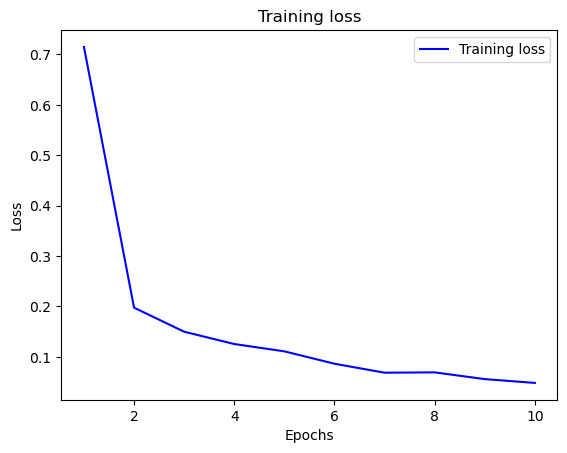

<Figure size 640x480 with 0 Axes>

In [46]:
plt.plot(epoch_range, loss, 'b', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

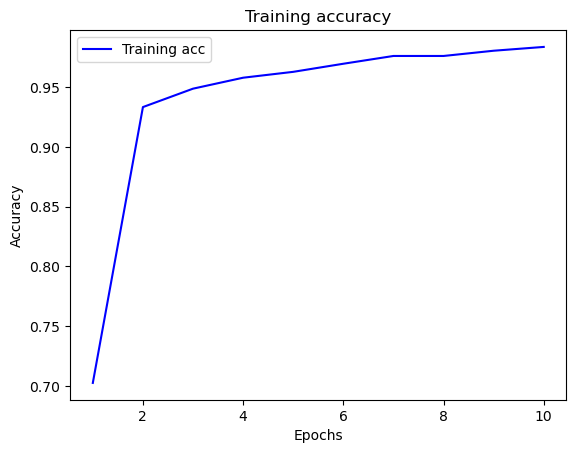

<Figure size 640x480 with 0 Axes>

In [47]:
plt.plot(epoch_range, acc, 'b', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

In [61]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

X_val = []
files = []
num_classes = []
for category in categories : 
    class_files = glob.glob("./output/val/" + category[0] + "_IMG/*.jpg")
    num_classes.append(len(class_files))
    files.extend(class_files)

print(len(files))
print(num_classes)

2355
[599, 599, 601, 556]


In [62]:
for file in files : 
    image = Image.open(file)
    image = image.convert("RGB")
    image = image.resize((64, 64))
    data = np.asarray(image)
    X_val.append(data)
    
X_val = np.array(X) 

In [63]:
X_val = X_val.astype('float32')
X_val /= 255

In [64]:
model = load_model("./multi_img_classification.model")
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 31, 31, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 14, 14, 64)       

In [65]:
y_pred = model.predict(X_val)
np.set_printoptions(formatter={'float' : lambda x : '{0:0.3f}'.format(x)}) 
print(len(y_pred))

74/74 [==============================] - 2s 29ms/step
2355


In [67]:
predictions = []
for i, v in enumerate(y_pred) : 
    predictions.append(v.argmax())
    
print(len(predictions))
print(predictions.count(0))
print(predictions.count(1))
print(predictions.count(2))
print(predictions.count(3))

2355
599
599
590
567


In [68]:
samples = []
random_num = random.randrange(0, len(y_pred) + 1)

for i in range(0, 20) :
    while random_num in samples : 
        random_num = random.randrange(0, len(y_pred) + 1)
    samples.append(random_num)

print(samples)

[1903, 785, 1815, 2230, 1215, 104, 1001, 1514, 1541, 440, 510, 172, 1249, 1683, 329, 1334, 1387, 1710, 689, 1301]


In [69]:
for sample in samples : 
    class_str = categories[predictions[sample]][0]
    print("사진 " + files[sample].split("\\")[1] + "는 " + class_str + "로 추정됩니다.")
    image = Image.open(files[sample])
    image.show()

사진 PE_089_1624_0.jpg는 PE로 추정됩니다.
사진 PS_040_7466_2.jpg는 PS로 추정됩니다.
사진 PE_088_151_1.jpg는 PE로 추정됩니다.
사진 PE_098_223_2.jpg는 PE로 추정됩니다.
사진 PP_061_270_2.jpg는 PP로 추정됩니다.
사진 PET_025_328_0.jpg는 PET로 추정됩니다.
사진 PS_041_1407_1.jpg는 PS로 추정됩니다.
사진 PP_064_4506_2.jpg는 PP로 추정됩니다.
사진 PP_064_4596_1.jpg는 PP로 추정됩니다.
사진 PET_027_2261_2.jpg는 PET로 추정됩니다.
사진 PET_027_2388_0.jpg는 PET로 추정됩니다.
사진 PET_025_7871_1.jpg는 PET로 추정됩니다.
사진 PP_061_330_1.jpg는 PP로 추정됩니다.
사진 PP_065_7122_1.jpg는 PP로 추정됩니다.
사진 PET_026_556_0.jpg는 PET로 추정됩니다.
사진 PP_061_502_0.jpg는 PP로 추정됩니다.
사진 PP_061_7097_2.jpg는 PP로 추정됩니다.
사진 PP_065_7198_0.jpg는 PP로 추정됩니다.
사진 PS_040_490_0.jpg는 PS로 추정됩니다.
사진 PP_061_442_0.jpg는 PP로 추정됩니다.


In [70]:
for i, v in enumerate(predictions) :
    class_str = categories[predictions[i]][0]
    print("사진 " + files[i].split("\\")[1] + "는 " + class_str + "로 추정됩니다.")

사진 PET_025_144_0.jpg는 PET로 추정됩니다.
사진 PET_025_146_0.jpg는 PET로 추정됩니다.
사진 PET_025_147_0.jpg는 PET로 추정됩니다.
사진 PET_025_147_2.jpg는 PET로 추정됩니다.
사진 PET_025_149_2.jpg는 PET로 추정됩니다.
사진 PET_025_153_1.jpg는 PET로 추정됩니다.
사진 PET_025_160_1.jpg는 PET로 추정됩니다.
사진 PET_025_161_0.jpg는 PET로 추정됩니다.
사진 PET_025_161_1.jpg는 PET로 추정됩니다.
사진 PET_025_162_0.jpg는 PET로 추정됩니다.
사진 PET_025_164_2.jpg는 PET로 추정됩니다.
사진 PET_025_165_1.jpg는 PET로 추정됩니다.
사진 PET_025_167_1.jpg는 PET로 추정됩니다.
사진 PET_025_167_2.jpg는 PET로 추정됩니다.
사진 PET_025_168_1.jpg는 PET로 추정됩니다.
사진 PET_025_170_2.jpg는 PET로 추정됩니다.
사진 PET_025_171_1.jpg는 PET로 추정됩니다.
사진 PET_025_171_2.jpg는 PET로 추정됩니다.
사진 PET_025_176_1.jpg는 PET로 추정됩니다.
사진 PET_025_176_2.jpg는 PET로 추정됩니다.
사진 PET_025_177_0.jpg는 PET로 추정됩니다.
사진 PET_025_179_1.jpg는 PET로 추정됩니다.
사진 PET_025_17_1.jpg는 PET로 추정됩니다.
사진 PET_025_17_2.jpg는 PET로 추정됩니다.
사진 PET_025_181_0.jpg는 PET로 추정됩니다.
사진 PET_025_186_1.jpg는 PET로 추정됩니다.
사진 PET_025_187_0.jpg는 PET로 추정됩니다.
사진 PET_025_188_1.jpg는 PET로 추정됩니다.
사진 PET_025_18_1.jpg는 PET로 추정됩니다.
사진 PET_025_194_1.